In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import os
import random
from shutil import copyfile
from keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
root_path='/content/drive/MyDrive/Kuliah/Bangkit 2022/'
os.makedirs(os.path.join(root_path,'training'))
os.makedirs(os.path.join(root_path,'testing'))

In [ ]:
root_path='/content/drive/MyDrive/Kuliah/Bangkit 2022/'
dir_path=['whitehead','pustula','dermatitis perioral', 'blackhead', 'acne nodules',
          'flek hitam', 'acne fulminans', 'rosacea', 'fungal acne', 'milia', 'papula']
training_dir=root_path+'/training'
testing_dir=root_path+'/testing'

In [ ]:
for dir in dir_path:
  os.makedirs(os.path.join(training_dir,dir))
  os.makedirs(os.path.join(testing_dir,dir))

In [ ]:
def splitData(source,training, testing,split_size):
  #Make function to split the dataset into training and testing
    files=[]
    for filename in os.listdir(source):
      file=source+'/'+filename
      if os.path.getsize(file)>0:
        files.append(filename)
      else:
        print(filename+" is zero length")
    training_length=int(len(files)*split_size)
    testing_length=int(len(files)-training_length)
    shuffled_set=random.sample(files, len(files))
    training_set=shuffled_set[:training_length]
    testing_set=shuffled_set[training_length:]

    for filename in training_set:
      this_file=source+'/'+filename
      destination=training+filename
      copyfile(this_file,destination)
    for filename in testing_set:
      this_file=source+'/'+filename
      destination=testing+filename
      copyfile(this_file,destination)
    pass


In [ ]:
#Split dataset and copy into different folder
for dir in dir_path:
  splitData(root_path+'/Dataset/'+dir,training_dir+'/'+dir+'/',testing_dir+'/'+dir+'/',.9)

In [ ]:
#Create ImageDataGenerator
def training_testing_generator(training_dir,testing_dir):
  train_datagen=ImageDataGenerator(
      rescale=1.0/255.0,
      rotation_range=30,
      height_shift_range=.4,
      width_shift_range=.4,
      zoom_range=.3,
      shear_range=.3,
      horizontal_flip=True,
      fill_mode='nearest'
  )
  valid_datagen=ImageDataGenerator(rescale=1.0/255.0)
  train_generator=train_datagen.flow_from_directory(training_dir,batch_size=64,class_mode='categorical',target_size=(224,224))
  valid_generator=valid_datagen.flow_from_directory(training_dir,batch_size=64,class_mode='categorical',target_size=(224,224))
  return train_generator,valid_generator

In [ ]:
#Make the generator
train_generator, validation_generator = training_testing_generator(training_dir, testing_dir)

Found 677 images belonging to 11 classes.
Found 677 images belonging to 11 classes.


In [ ]:
#Create Model
def createModel():
  feature_extractor= hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5',input_shape=(224,224) + (3,))
  feature_extractor.trainable = True
  model=tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(11,activation='softmax')
  ])
  model.summary()
  return model

In [ ]:
#Make model
model=createModel()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=20,verbose=1,validation_data=validation_generator)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_10 (KerasLayer)  (None, 1001)             5508713   
                                                                 
 dense_10 (Dense)            (None, 11)                11022     
                                                                 
Total params: 5,519,735
Trainable params: 5,495,335
Non-trainable params: 24,400
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


11/11 [==============================] - 36s 2s/step - loss: 2.3688 - accuracy: 0.4505 - val_loss: 3.9194 - val_accuracy: 0.3117
Epoch 2/20
11/11 [==============================] - 22s 2s/step - loss: 1.2395 - accuracy: 0.7267 - val_loss: 2.8136 - val_accuracy: 0.4756
Epoch 3/20
11/11 [==============================] - 22s 2s/step - loss: 1.1446 - accuracy: 0.7578 - val_loss: 2.1410 - val_accuracy: 0.5982
Epoch 4/20
11/11 [==============================] - 22s 2s/step - loss: 0.9553 - accuracy: 0.8198 - val_loss: 3.0821 - val_accuracy: 0.5436
Epoch 5/20
11/11 [==============================] - 22s 2s/step - loss: 0.7230 - accuracy: 0.8936 - val_loss: 1.7718 - val_accuracy: 0.6809
Epoch 6/20
11/11 [==============================] - 22s 2s/step - loss: 0.7154 - accuracy: 0.8715 - val_loss: 1.9097 - val_accuracy: 0.7326
Epoch 7/20
11/11 [==============================] - 22s 2s/step - loss: 0.7693 - accuracy: 0.8700 - val_loss: 2.1937 - val_accuracy: 0.6544
Epoch 8/20
11/11 [=============

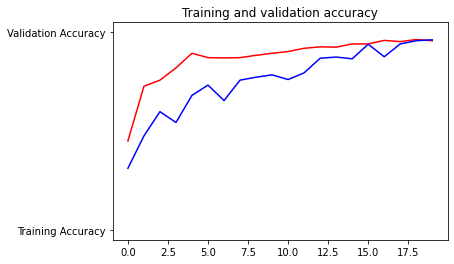

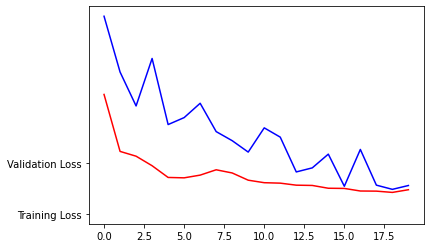

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
labels=['papula', 'milia', 'fungal acne', 'rosacea', 'acne fulminans', 'flek hitam', 
        'acne nodules', 'black head', 'dermatitis perioral', 'pustula', 'whitehead']

In [ ]:
#Predict model
import cv2
np_image = cv2.imread('/content/testing.jpeg')
np_image = np.array(np_image).astype('float32')/255
np_image = tf.image.resize(np_image, (224, 224))
np_image = np.expand_dims(np_image, axis=0)
predicted=model.predict(np_image)
label = predicted.argmax(axis=-1)
print(labels[label[0]])

acne nodules
